In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
from scipy.interpolate import RectBivariateSpline
from mpl_toolkits.mplot3d import Axes3D

#custom modules
from plotting import create_3D_loss_manifold

sea.set(style="white")

In [17]:
def loadmaxsics_pd(m1, m2):
    
    msicandstd1 = np.load(f"data/maxsicandstd1_script{float(m1)}{float(m2)}.npy", allow_pickle = True).item()
    msicandstd2 = np.load(f"data/maxsicandstd2_script{float(m1)}{float(m2)}.npy", allow_pickle = True).item()

    msic1_ensemble = []
    std1_ensemble = []
    msic2_ensemble = []
    std2_ensemble = []
    sigspace = np.logspace(-3,-1,10)
    for sig in sigspace:
        msic1_ensemble.append(msicandstd1[sig][0])
        std1_ensemble.append(msicandstd1[sig][1])
        msic2_ensemble.append(msicandstd2[sig][0])
        std2_ensemble.append(msicandstd2[sig][1])

    msic1_ensemble = np.array(msic1_ensemble)
    std1_ensemble = np.array(std1_ensemble)
    msic2_ensemble = np.array(msic2_ensemble)
    std2_ensemble = np.array(std2_ensemble)

    maxsicdata_pd = pd.DataFrame({
        "Semi Weak Max Sics": msic1_ensemble,
        "Semi Weak Max Sic Std": std1_ensemble,
        "CWOLA Max Sics": msic2_ensemble,
        "CWOLA Max Sic Std": std2_ensemble,
    })

    maxsicdata_pd.index = sigspace
    maxsicdata_pd.index.name = "Signal fraction"


    return maxsicdata_pd

In [18]:
loadmaxsics_pd(3, 3)

,Semi Weak Max Sics,Semi Weak Max Sic Std,CWOLA Max Sics,CWOLA Max Sic Std
Signal fraction,,,,
0.001000,4.742700,3.240768,1.367131,0.478059
0.001668,2.547927,2.203375,1.031395,0.075775
0.002783,5.883070,3.084638,1.399733,0.303598
0.004642,5.199914,3.964596,3.590441,1.273853
0.007743,11.506970,8.409108,10.904769,2.803571
0.012915,27.758310,9.744495,14.423079,1.104973
0.021544,20.666271,9.649549,17.006564,1.216417
0.035938,27.566673,4.355124,20.008676,1.488198
0.059948,27.569574,0.241586,21.311526,0.907995


In [4]:
msicandstd1

{0.1: (27.910284553115087, 0.1509185360745794),
 0.05994842503189409: (27.569574321596843, 0.24158632944740427),
 0.03593813663804626: (27.56667345632414, 4.355123876880812),
 0.021544346900318832: (20.666270613580746, 9.649549073445822),
 0.01291549665014884: (27.758309636830344, 9.744494705619264),
 0.007742636826811269: (11.506970307902801, 8.409108194432008),
 0.004641588833612777: (5.199913977567961, 3.9645956429454587),
 0.0027825594022071257: (5.8830703199759, 3.0846378423533554),
 0.0016681005372000592: (2.547927188571415, 2.2033752440005427),
 0.001: (4.742700074391929, 3.2407681693696837)}

In [5]:
msic1_runs = np.load("data/msic1_median33.npy", allow_pickle = True)
msic2_runs = np.load("data/msic2_median33.npy", allow_pickle = True)
msic1std_runs = np.load("data/std1_median33.npy", allow_pickle = True)
msic2std_runs = np.load("data/std2_median33.npy", allow_pickle = True)
weight_list1_runs33 = np.load("data/weight_list1_runs33.npy", allow_pickle = True)
weight_list2_runs33 = np.load("data/weight_list2_runs33.npy", allow_pickle = True)
weight_list3_runs33 = np.load("data/weight_list3_runs33.npy", allow_pickle = True)

In [6]:
msic1_runs

array([27.80012926, 27.67757194])

In [7]:
msic1_runs_2 = np.load("data/msic1_median33_2.npy", allow_pickle = True)
msic2_runs_2 = np.load("data/msic2_median33_2.npy", allow_pickle = True)
msic1std_runs_2 = np.load("data/std1_median33_2.npy", allow_pickle = True)
msic2std_runs_2 = np.load("data/std2_median33_2.npy", allow_pickle = True)
weight_list1_runs33_2 = np.load("data/weight_list1_runs33_2.npy", allow_pickle = True)
weight_list2_runs33_2 = np.load("data/weight_list2_runs33_2.npy", allow_pickle = True)
weight_list3_runs33_2 = np.load("data/weight_list3_runs33_2.npy", allow_pickle = True)

In [8]:
msic1_runs_2

array([ 4.10005401,  1.98997225,  3.19145142,  9.231583  ,  9.43653325,
       20.46237718, 27.46610011, 27.6154108 ])

In [4]:
msic1_runs_plot = np.concatenate([msic1_runs_2, msic1_runs])
msic2_runs_plot = np.concatenate([msic2_runs_2, msic2_runs])
msic1std_runs_plot = np.concatenate([msic1std_runs_2, msic1std_runs])
msic2std_runs_plot = np.concatenate([msic2std_runs_2, msic2std_runs])

In [41]:
weight_list1_runs33[0]

array([[2.5206482 , 5.6373887 , 4.3217072 , 3.973913  , 5.8021913 ],
       [1.2183073 , 5.998011  , 0.87432134, 4.6859074 , 1.2710109 ],
       [1.2127403 , 5.5183406 , 0.9794255 , 5.7885027 , 3.1983044 ],
       [3.2001586 , 4.6959786 , 5.508586  , 1.6529999 , 4.673347  ],
       [1.2138218 , 4.6740727 , 0.8800344 , 5.5193434 , 3.0753872 ],
       [5.791618  , 0.98552346, 4.684071  , 4.2741637 , 4.5624304 ],
       [4.694997  , 3.0807176 , 2.5115254 , 1.6468878 , 0.88982207],
       [3.8071344 , 2.5050945 , 3.802669  , 4.2721176 , 2.4994013 ],
       [1.272116  , 1.2156057 , 4.6897807 , 0.5       , 4.6905093 ],
       [4.6776247 , 1.6474891 , 0.86605155, 1.2208607 , 5.9926214 ]],
      dtype=float32)

In [7]:
# msic1_runs = np.load("msic1_median2.npy", allow_pickle = True)
# msic2_runs = np.load("msic2_median2.npy", allow_pickle = True)
# msic1_stds = np.load("msic1_std2.npy", allow_pickle = True)
# msic2_stds = np.load("msic2_stds2.npy", allow_pickle = True)
# msic1_runs

In [12]:
msic1_runs = np.load("data/msic1_median_test.npy", allow_pickle = True)
msic2_runs = np.load("data/msic2_median_test.npy", allow_pickle = True)
msic1std_runs = np.load("data/msic1_std_test.npy", allow_pickle = True)
msic2std_runs = np.load("data/msic2_std_test.npy", allow_pickle = True)
msic1_runs

array([ 2.92734998,  2.92783794,  2.29259604,  3.02682244,  3.7900691 ,
       22.61388261, 22.30287109, 22.84938631, 22.9282612 , 23.01205837])

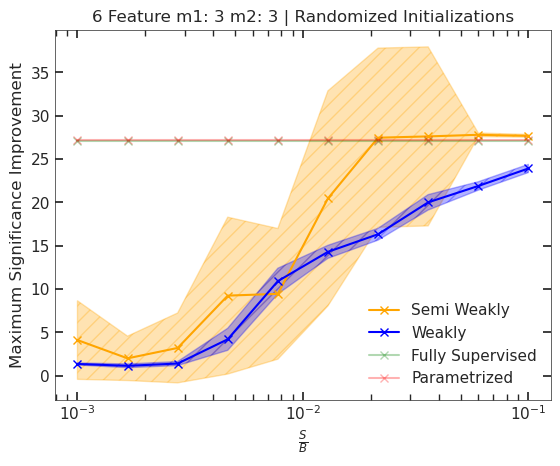

In [9]:
import pickle
from utils import send_slack_plot

m1, m2 = 3, 3

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_runs_plot, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_runs_plot, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [27.0314350978661]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
plt.plot(sigspace, [27.17299849612719]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, msic1_runs_plot - msic1std_runs_plot, msic1_runs_plot + msic1std_runs_plot, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_runs_plot - msic2std_runs_plot, msic2_runs_plot + msic2std_runs_plot, color='blue', alpha=0.3, hatch = "//")
#plt.fill_between(sigspace, avgmsic3 - msicstds3, avgmsic3 + msicstds3, color='green', alpha=0.3, hatch = "//")
#plt.fill_between(sig_space, avgmsic4 - msicstds4, avgmsic4 + msicstds4, color='green', alpha=0.3, hatch = "//")

sea.set(style="white")
plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = "plots/maxsicplot65k33.png"
plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

send_slack_plot(img_path)

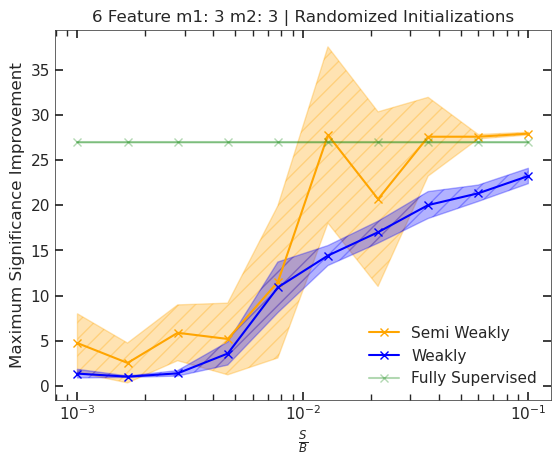

/global/homes/g/gupsingh/.local/perlmutter/python-3.11/lib/python3.11/site-packages/slack_sdk/web/internal_utils.py:417: UserWarning: client.files_upload() may cause some issues like timeouts for relatively large files. Our latest recommendation is to use client.files_upload_v2(), which is mostly compatible and much stabler, instead.
  warnings.warn(message)


Plot sent successfully: None


In [16]:
from utils import send_slack_plot

m1, m2 = 3, 3

sigspace = np.logspace(-3, -1, 10)
plt.figure()
sea.set(style="white")
plt.plot(sigspace, msic1_ensemble, marker = "x", label='Semi Weakly', color='orange')
plt.plot(sigspace, msic2_ensemble, marker = "x", label='Weakly', color='blue')
plt.plot(sigspace, [27.0314350978661]*len(sigspace), marker = "x", label='Fully Supervised', color='green', alpha = 0.3)
#plt.plot(sigspace, [27.17299849612719]*len(sigspace), marker = "x", label='Parametrized', color='red', alpha = 0.3)

plt.fill_between(sigspace, msic1_ensemble - std1_ensemble, msic1_ensemble + std1_ensemble, color='orange', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, msic2_ensemble - std2_ensemble, msic2_ensemble + std2_ensemble, color='blue', alpha=0.3, hatch = "//")
plt.fill_between(sigspace, [27.0314350978661]*len(sigspace), [27.0314350978661]*len(sigspace), color='green', alpha=0.3, hatch = "//")
#plt.fill_between(sig_space, avgmsic4 - msicstds4, avgmsic4 + msicstds4, color='green', alpha=0.3, hatch = "//")

sea.set(style="white")
plt.xlabel(r'$\frac{S}{B}$')
plt.ylabel('Maximum Significance Improvement')
plt.title(f'6 Feature m1: {m1} m2: {m2} | Randomized Initializations')
plt.xscale("log")
plt.legend(loc="lower right",frameon=False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
img_path = "plots/maxsicplot65k33.png"
plt.savefig(img_path, dpi=450, bbox_inches='tight')
plt.show()

send_slack_plot(img_path)

In [ ]:
# ww_runs = np.load("4Features3Param33Perturb_WEIGHTLIST.npy")
# avgww = np.median(ww_runs, axis = 0)

# fittedw = avgww
# fittedwstd = np.std(ww_runs, axis = 0)
# plt.figure()
# plt.plot(sigspace, fittedw, marker = "x", label='Semi Weakly', color='orange')
# plt.plot(sigspace, sigspace, marker = "", label='S/B', color='black')

# plt.fill_between(sigspace, fittedw - fittedwstd, fittedw + fittedwstd, color='orange', alpha=0.3, hatch = "//")

# plt.xlabel(r'$\frac{S}{B}$')

# plt.ylabel(r'Fitted $\frac{S}{B}$')
# plt.title(f'6 Features 3 Parameters Fitted m1: {3.5} m2: {5.5} | w1: {2} w2: {5}')
# plt.yscale("log")
# plt.xscale("log")
# plt.gca().spines['left'].set_linewidth(0.5)
# plt.gca().spines['bottom'].set_linewidth(0.5)
# plt.gca().spines['top'].set_linewidth(0.5)
# plt.gca().spines['right'].set_linewidth(0.5)
# plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
# plt.tick_params(axis='both', which='both', direction='in', bottom=True, left=True)
# plt.legend(loc="lower right",frameon=False)
# #plt.savefig('plot.png', dpi=450, bbox_inches='tight')
# plt.show()

<Axes3D: title={'center': 'Loss Manifold m1: 3 m2: 3 sigfrac: 0.1'}, xlabel='W1', ylabel='W2', zlabel='Loss'>

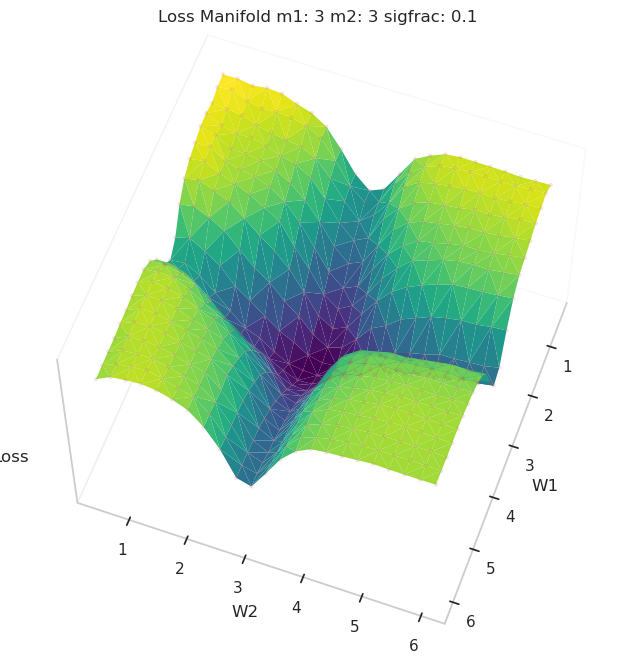

In [9]:
z_33 = np.load("data/z_3param336.npy", allow_pickle = True).item()
sigfrac = np.logspace(-3,-1,10)[9]
m1,m2 = 3, 3
step = 0.25
elv = 60
azim = 20
create_3D_loss_manifold(sigfrac, m1, m2, z_33, step, elv, azim)

<Axes3D: title={'center': 'Loss Manifold m1: 5 m2: 1 sigfrac: 0.1'}, xlabel='W1', ylabel='W2', zlabel='Loss'>

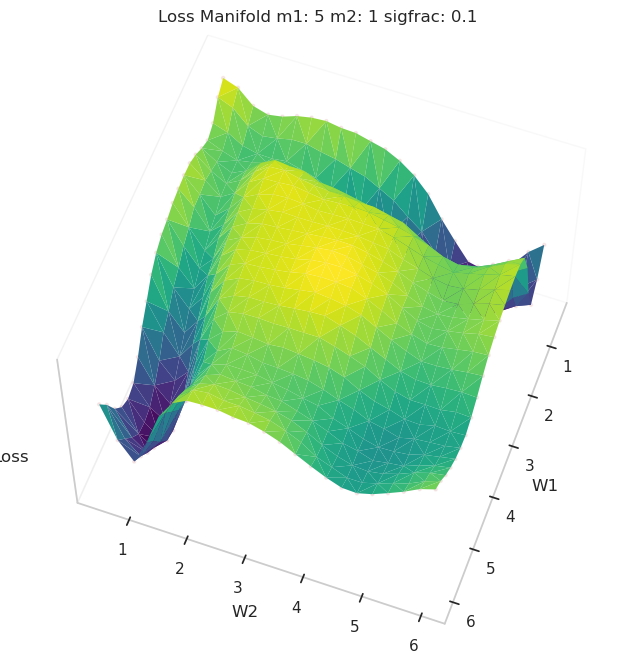

In [20]:
z = np.load("data/z_3param516model_qq_v2.npy", allow_pickle = True).item()
#sigfrac = np.logspace(-3,-1,10)[9]
m1,m2 = 5, 1
step = 0.25
elv = 60
azim = 20
create_3D_loss_manifold(0.1, m1, m2, z, step, elv, azim, save = False)

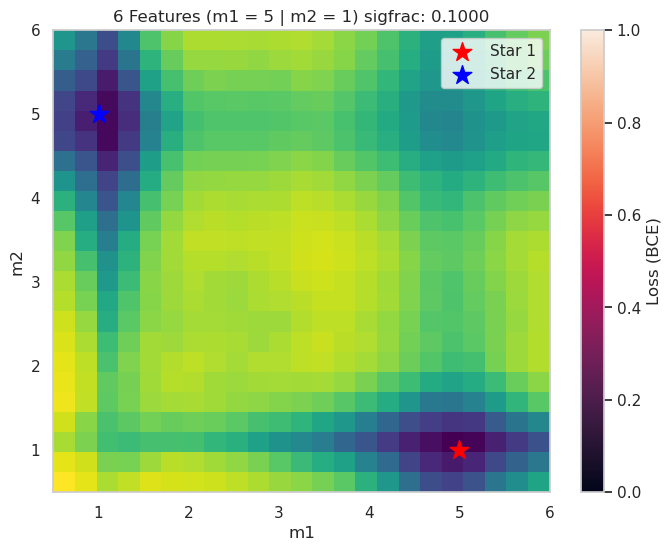

(array([[1.        , 0.96021069, 0.87035737, 0.9258827 , 0.97335263,
         0.96708532, 0.95892833, 0.94251727, 0.92572014, 0.88972599,
         0.87119497, 0.83526854, 0.80541527, 0.73676606, 0.63758176,
         0.51632414, 0.37021626, 0.2121743 , 0.18755433, 0.20887809,
         0.29305561, 0.41787584, 0.52582896],
        [0.95808621, 0.92651936, 0.80425708, 0.82100002, 0.90291534,
         0.90676016, 0.89982458, 0.87357456, 0.84024672, 0.79662838,
         0.76683381, 0.70416519, 0.6177458 , 0.56044142, 0.46003572,
         0.35806093, 0.25834156, 0.1477018 , 0.08279808, 0.11648263,
         0.21951175, 0.30812787, 0.39726776],
        [0.87128302, 0.7980146 , 0.69874676, 0.71389352, 0.75246821,
         0.75497874, 0.71183452, 0.68551   , 0.62452335, 0.59896644,
         0.54174108, 0.5021527 , 0.42357196, 0.36314973, 0.26458855,
         0.2025882 , 0.10136522, 0.02301477, 0.02103478, 0.02681895,
         0.07336776, 0.17018375, 0.2317145 ],
        [0.9025496 , 0.79430975, 0

In [32]:
from plotting import loss_landscape_nofit


<Axes3D: title={'center': 'Loss Manifold m1: 1 m2: 5.5 sigfrac: 0.1'}, xlabel='W1', ylabel='W2', zlabel='Loss'>

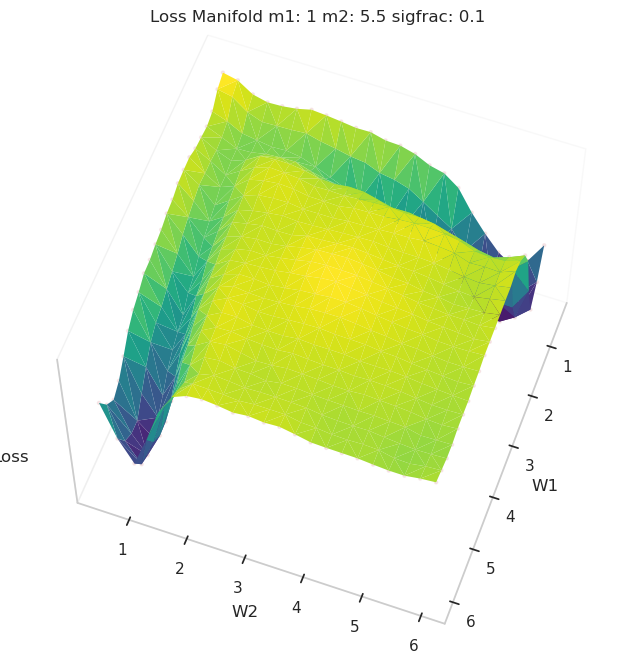

In [14]:
z = np.load("data/z_2param15.56model_qq_v23prong.npy", allow_pickle = True).item()
#sigfrac = np.logspace(-3,-1,10)[9]
m1,m2 = 1, 5.5
step = 0.25
elv = 60
azim = 20
create_3D_loss_manifold(0.1, m1, m2, z, step, elv, azim, save = False)